# Title

**Exercise: Bagging Classification with Decision Boundary**

# Description

The goal of this exercise is to use **Bagging** (Bootstrap Aggregated) to solve a
classification problem and visualize the influence on Bagging on trees with varying depths.

# Instructions:
- Read the dataset `agriland.csv`.
- Assign the predictor and response variables as `X` and `y`.
- Split the data into train and test sets with `test_split=0.2` and `random_state=44`.
- Fit a single `DecisionTreeClassifier()` and find the accuracy of your prediction.
- Complete the helper function `prediction_by_bagging()` to find the average predictions for a given number of bootstraps.
- Now perform **Bagging** using the helper function, and compute the new accuracy.
- Proceed to plot of accuracy with increasing number of bootstraps.
- Finally, use the helper code to plot the decision boundaries for varying `max_depth` along with `num_bootstraps`. Investigate the effect of increasing bootstraps on the variance.

# Hints:

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn-tree-decisiontreeclassifier" target="_blank">sklearn.tree.DecisionTreeClassifier()</a> : A decision tree classifier.

<a href="https://docs.scipy.org/doc//numpy-1.10.4/reference/generated/numpy.random.choice.html" target="_blank">np.random.choice</a> : Generates a random sample from a given 1-D array

<a href="https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplots.html" target="_blank">plt.subplots()</a> : Create a figure and a set of subplots.

<a href="https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.plot.html" target="_blank">ax.plot()</a> : Plot y versus x as lines and/or markers

# Bagging Classification

In [1]:
# Import required libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.optimize as opt
from sklearn.metrics import accuracy_score

# to be used for plotting later

from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFF4E5','#D2E3EF'])
cmap_bold = ListedColormap(['#F7345E','#80C3BD'])

In [2]:
# Read the file 'agriland.csv' and take a quick look at your data
df = pd.read_csv('agriland.csv')

# Note that the latitude & longitude values are normalized
df.head()

,latitude,longitude,land_type
0,-0.071860,-1.297410,1.0
1,-0.179482,-0.874892,1.0
2,-1.217428,-1.352105,0.0
3,1.143306,-0.894172,1.0
4,-3.033199,0.818646,0.0


In [3]:
X = df[['latitude', 'longitude']]
y = df['land_type']

In [4]:
#split data in train an test, with test size = 0.2 and randomstate=44

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=44)

In [5]:
max_depth = 4  # You can adjust this depth based on model performance
clf = DecisionTreeClassifier(max_depth=max_depth, random_state=44)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=44)

In [6]:
prediction = clf.predict(X_test)
single_acc = clf.score(X_test, y_test)  # This calculates the accuracy directly
print(f'Single Tree Accuracy is {single_acc*100:.2f}%')

Single Tree Accuracy is 82.50%


In [7]:
def prediction_by_bagging(X_train, y_train, X_to_evaluate, num_bootstraps):
    # list to store every array of predictions
    predictions = []

    # generate num_bootstraps number of trees
    for i in range(num_bootstraps):
        # sample data to perform first bootstrap, here, we actually bootstrap indices, because we want the same subset for X_train and y_train
        resample_indexes = np.random.choice(np.arange(y_train.shape[0]), size=y_train.shape[0], replace=True)

        # get bootstrapped set for 'X' and 'y' using the above indices
        X_boot = X_train.iloc[resample_indexes]
        y_boot = y_train.iloc[resample_indexes]

        # train decision tree on bootstrap set, use the same max_depth and random_state as above
        clf = DecisionTreeClassifier(max_depth=4, random_state=44)

        # fit the model on bootstrapped training set
        clf.fit(X_boot, y_boot)

        # make predictions on X_to_evaluate samples
        pred = clf.predict(X_to_evaluate)

        predictions.append(pred)

    # To get the majority vote for each sample, we can find the average prediction and threshold them by 0.5
    # hint: you will elementwise sum up prediction_array_0, prediction_array_1, ..., prediction_array_n, and average
    # then you will check if each average number is >0.5
    # you can do this using list comprehension, with one line of code

    # Convert list of predictions to an array for easier calculations
    predictions = np.array(predictions)

    # Calculate the mean across all bootstrap predictions for each sample
    average_prediction = np.mean(predictions, axis=0) > 0.5

    return average_prediction.astype(int)

In [8]:
# Define the number of bootstraps to be used
num_bootstraps = 200

y_pred = prediction_by_bagging(X_train, y_train, X_test, num_bootstraps=num_bootstraps)

# Compare the average predictions to the true test set values and compute the accuracy
bagging_accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy with Bootstrapped Aggregation is {bagging_accuracy*100:.2f}%')

Accuracy with Bootstrapped Aggregation is 87.50%


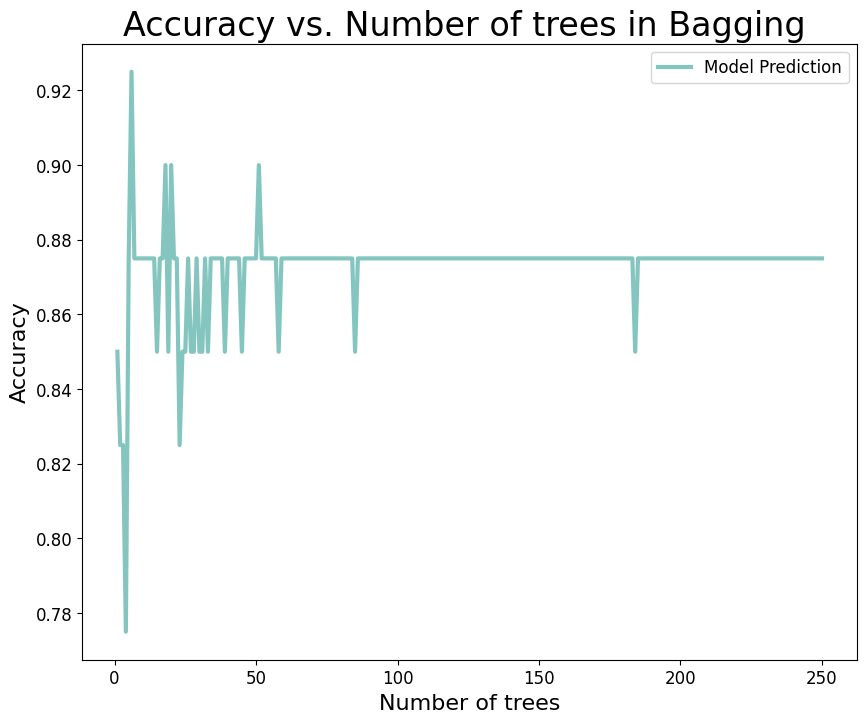

In [9]:
# To visualize, lets plot accuracy as a function of the number of trees in the Bagging

# Run the helper code below, and if your function is well defined above, you should see a plot of accuracy vs number of bagged trees

n = np.linspace(1,250,250).astype(int)
acc = []
for n_i in n:
    acc.append(np.mean(prediction_by_bagging(X_train, y_train, X_test, n_i)==y_test))
plt.figure(figsize=(10,8))
plt.plot(n,acc,alpha=0.7,linewidth=3,color='#50AEA4', label='Model Prediction')
plt.title('Accuracy vs. Number of trees in Bagging ',fontsize=24)
plt.xlabel('Number of trees',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best',fontsize=12)
plt.show()



## Bagging Visualization

Bagging does well to reduce overfitting, but only upto a certain extent.

Vary the `max_depth` and `numboot` variables to see how Bagging helps reduce overfitting with the help of the visualization below

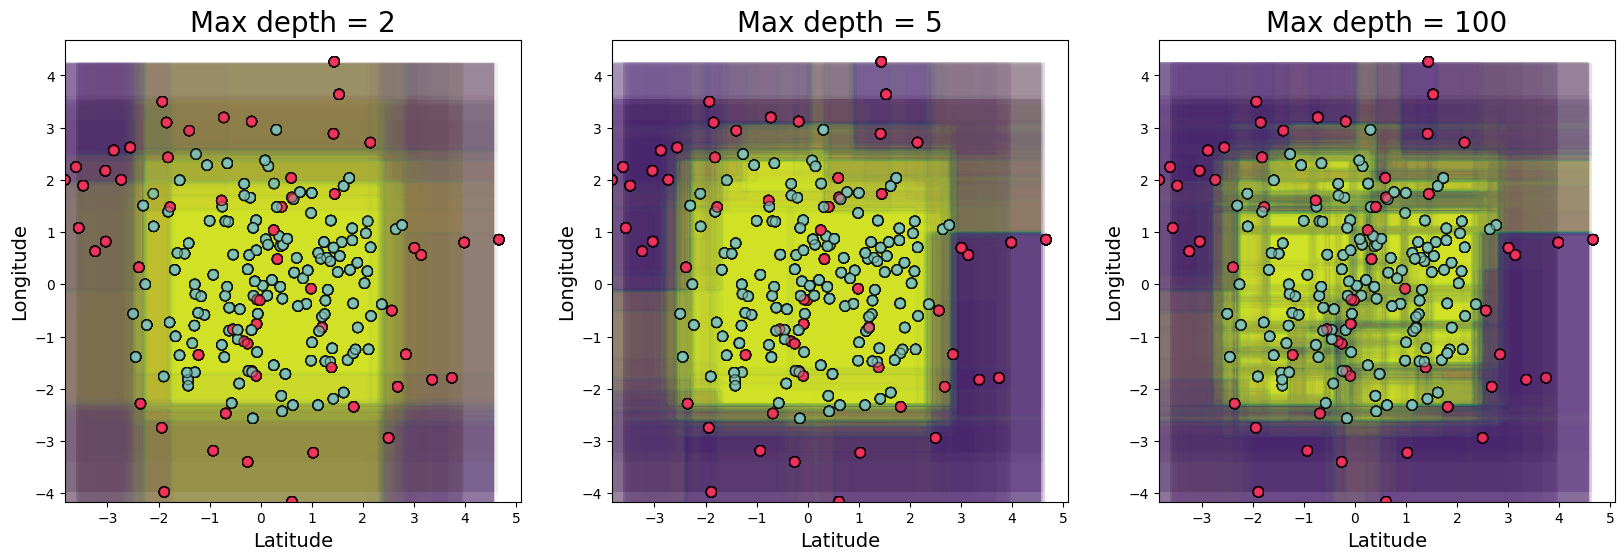

In [10]:
# We will make plots for three different values of `max_depth`

fig,axes = plt.subplots(1,3,figsize=(20,6))

# Make a list of three max_depths to investigate
max_depth = [2,5,100]

# Fix the number of bootstraps

numboot = 100

for index,ax in enumerate(axes):

    for i in range(numboot):
        df_new = df.sample(frac=1,replace=True)
        y = df_new.land_type.values
        X = df_new[['latitude', 'longitude']].values
        dtree = DecisionTreeClassifier(max_depth=max_depth[index])
        dtree.fit(X, y)
        ax.scatter(X[:, 0], X[:, 1], c=y-1, s=50,alpha=0.5,edgecolor="k",cmap=cmap_bold)
        plot_step_x1= 0.1
        plot_step_x2= 0.1
        x1min, x1max= X[:,0].min(), X[:,0].max()
        x2min, x2max= X[:,1].min(), X[:,1].max()
        x1, x2 = np.meshgrid(np.arange(x1min, x1max, plot_step_x1), np.arange(x2min, x2max, plot_step_x2) )
        # Re-cast every coordinate in the meshgrid as a 2D point
        Xplot= np.c_[x1.ravel(), x2.ravel()]

        # Predict the class
        y = dtree.predict( Xplot )
        y= y.reshape( x1.shape )
        cs = ax.contourf(x1, x2, y, alpha=0.02)


    ax.set_xlabel('Latitude',fontsize=14)
    ax.set_ylabel('Longitude',fontsize=14)
    ax.set_title(f'Max depth = {max_depth[index]}',fontsize=20)



## Mindchow 🍲
Play around with the following parameters:

- max_depth
- numboot

Based on your observations, answer the questions below:

- How does the plot change with varying `max_depth`

- How does the plot change with varying `numboot`

- How are the three plots essentially different?

- Does more bootstraps reduce overfitting for
    - High depth
    - Low depth

	1.	How does the plot change with varying max_depth?
	•	As max_depth increases, the decision boundaries in the plot become more complex and fragmented. This is because a higher max_depth allows the decision tree to make more splits to better fit the data, which can lead to a model capturing more detailed patterns (or noise) in the training data.
	2.	How does the plot change with varying num_boot (number of bootstraps)?
	•	Increasing the num_boot parameter, which controls the number of decision trees in the ensemble, does not directly affect the decision boundaries of individual trees but affects the overall decision boundaries when predictions are aggregated. With more trees, the aggregated prediction (majority vote or average) tends to be smoother and more stable, reducing the variance among the individual trees’ predictions.
	3.	How are the three plots essentially different?
	•	The first plot, with low max_depth, shows simple, broad decision boundaries indicating underfitting.
	•	The second plot, with high max_depth but low num_boot, shows very complex, overfitted decision boundaries with many irregularities.
	•	The third plot, with high max_depth and high num_boot, shows complex but smoother decision boundaries compared to the second plot, indicating a reduction in variance through averaging multiple overfit models.
	4.	Does more bootstraps reduce overfitting for high depth and low depth?
	•	High depth: More bootstraps do help in reducing overfitting when max_depth is high. By averaging or voting among many overfit models, the ensemble can mitigate some of the overfitting by essentially smoothing out anomalies that only appear in a few of the models.
	•	Low depth: For models with low max_depth, overfitting is less of a concern to begin with, as these models tend to underfit. More bootstraps in this scenario will still help improve model accuracy by reducing variance and might slightly increase the model’s ability to capture more complex patterns, thus potentially shifting the model from underfitting towards an optimal fit.